In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Vidio.csv', on_bad_lines='skip')
df

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,2020-02-15T12:07:00.000Z,...,1.11.0 (50),NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,2020-02-14T18:37:52.000Z,...,NaN,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
2,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,24abc04f114c9cb0c2087568093a909f04b3a567041fff...,4906987a7a6c3e27895e1adfd200d38e4f4fd87eb9ce96...,NaN,e73122fb4da263f0825c2ae5ac5c5a18da3a45c44b49e6...,False,embed,web-mobile,2020-02-15T11:58:24.000Z,...,NaN,NaN,8,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
3,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,f1279ae82e3c45f7591ad8e43f69a87d7444bf1c4b70b1...,adaf91b743f2f1d7b93819b22c016ca700182bd1a5b854...,NaN,1e8d1186fbc7677e10aa4a512f20ec01348e3e7f9e4cb7...,False,embed,web-mobile,2020-02-15T06:36:08.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
4,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,151db218c9cbad4d9fa1b1196fd998a63a8314698580a6...,15689b6aebb6b896c7fdadb516c9754a34a2fcfb772dc3...,NaN,210d2693895749e26711ee890ef41c461994ce91a673aa...,False,embed,web-mobile,2020-02-15T01:53:03.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742577,ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,5e516727927f3f0177f16fb0be2d5c82e66e358ea16817...,9209013711f31904c9df398e324bb0f0e6453eb65cbebf...,NaN,30dbdcd95c43a8b3bba69e2c3a75816a2a3f028b71a265...,False,embed,web-mobile,2020-02-09T10:51:23.000Z,...,NaN,NaN,38,vod,NaN,Grammy Awards Beri Penghormatan Terakhir Untuk...,News,NaN,NaN,NaN
742578,ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,26f0b83af96401b14fc1bbdd7671bcab19eb45d86034e8...,bf2be8faea8f1d43cd77690384368177f4a443ed27b908...,NaN,16e524d9a1a6d5e324c17d0fb3a28caf09232ad2660f7f...,False,embed,web-mobile,2020-02-09T02:49:03.000Z,...,NaN,NaN,5,vod,NaN,Grammy Awards Beri Penghormatan Terakhir Untuk...,News,NaN,NaN,NaN
742579,ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,90d1ddc2984570ffafa169419b7a93bd9ee7511267ae0f...,502c28363dd19307cc907f548ab0b1c8ec71699e2c3bfc...,NaN,c184305bf88efbfffe1f7fae702f3c67e9b950db45230a...,False,embed,web-mobile,2020-02-09T08:57:13.000Z,...,NaN,NaN,3,vod,NaN,Grammy Awards Beri Penghormatan Terakhir Untuk...,News,NaN,NaN,NaN
742580,ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,f86b27fde2a1d8c78743d936c8a9719e551fb17cbcbc3f...,1b2f0e558021a570cb90d1c5e864cf7d471a278825b08b...,NaN,44581e34aaf6c63f5cd79e22cdb7a4dac40c7f0f489a5c...,False,embed,web-mobile,2020-02-09T03:57:42.000Z,...,NaN,NaN,8,vod,NaN,Grammy Awards Beri Penghormatan Terakhir Untuk...,News,NaN,NaN,NaN


In [3]:
## Checking datasets info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    742582 non-null  object 
 1   hash_play_id       742582 non-null  object 
 2   hash_visit_id      742582 non-null  object 
 3   hash_watcher_id    742582 non-null  object 
 4   hash_film_id       40525 non-null   object 
 5   hash_event_id      742582 non-null  object 
 6   is_login           742582 non-null  bool   
 7   playback_location  742582 non-null  object 
 8   platform           742582 non-null  object 
 9   play_time          742582 non-null  object 
 10  end_time           742582 non-null  object 
 11  referrer           702119 non-null  object 
 12  average_bitrate    707495 non-null  float64
 13  bitrate_range      742582 non-null  object 
 14  total_bytes        742582 non-null  int64  
 15  buffer_duration    742582 non-null  float64
 16  re

## Question 1 & 2:
Melakukan Eksploratory Data Analysis (EDA):
- Problem : Durasi waktu menonton 
- Tujuan : Mencari insight dan membuat model (regresi) Machine Learning untuk memprediksi durasi user yang menonton video (`play_duration`)

#### Data Wrangling

In [4]:
df_1 = df.copy()

In [5]:
df_1.head()

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,2020-02-15T12:07:00.000Z,...,1.11.0 (50),NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,2020-02-14T18:37:52.000Z,...,NaN,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
2,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,24abc04f114c9cb0c2087568093a909f04b3a567041fff...,4906987a7a6c3e27895e1adfd200d38e4f4fd87eb9ce96...,NaN,e73122fb4da263f0825c2ae5ac5c5a18da3a45c44b49e6...,False,embed,web-mobile,2020-02-15T11:58:24.000Z,...,NaN,NaN,8,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
3,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,f1279ae82e3c45f7591ad8e43f69a87d7444bf1c4b70b1...,adaf91b743f2f1d7b93819b22c016ca700182bd1a5b854...,NaN,1e8d1186fbc7677e10aa4a512f20ec01348e3e7f9e4cb7...,False,embed,web-mobile,2020-02-15T06:36:08.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
4,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,151db218c9cbad4d9fa1b1196fd998a63a8314698580a6...,15689b6aebb6b896c7fdadb516c9754a34a2fcfb772dc3...,NaN,210d2693895749e26711ee890ef41c461994ce91a673aa...,False,embed,web-mobile,2020-02-15T01:53:03.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN


In [6]:
## Mengubah Tipe Data yang salah
df_1['play_time'] = pd.to_datetime(df['play_time'])
df_1['end_time'] = pd.to_datetime(df['end_time'])

In [7]:
## checking Missing Value
df_1.isna().sum()

hash_content_id           0
hash_play_id              0
hash_visit_id             0
hash_watcher_id           0
hash_film_id         702057
hash_event_id             0
is_login                  0
playback_location         0
platform                  0
play_time                 0
end_time                  0
referrer              40463
average_bitrate       35087
bitrate_range             0
total_bytes               0
buffer_duration           0
referrer_group            0
completed            271020
utm_source           741797
utm_medium           741800
utm_campaign         742250
player_name           22875
has_ad                    0
flash_version        242930
os_name              235324
os_version             2734
browser_name         234709
browser_version      251508
app_name                  0
autoplay             271167
is_premium                0
app_version          500902
city                 742582
play_duration             0
content_type              0
stream_type         

#### Deleting some features
kolom akan dihapus dari dataset:
Dengan asumsi untuk data dengan kolom yang jumlah missing value > 50% (tidak terdapat informasi yang cukup untuk analisis)

In [8]:
for i in df_1.columns:
    if df_1[i].isna().sum() > len(df_1)/2:
        df_1.drop(columns = i, inplace = True)
    else:
        continue

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   hash_content_id    742582 non-null  object             
 1   hash_play_id       742582 non-null  object             
 2   hash_visit_id      742582 non-null  object             
 3   hash_watcher_id    742582 non-null  object             
 4   hash_event_id      742582 non-null  object             
 5   is_login           742582 non-null  bool               
 6   playback_location  742582 non-null  object             
 7   platform           742582 non-null  object             
 8   play_time          742582 non-null  datetime64[ns, UTC]
 9   end_time           742582 non-null  datetime64[ns, UTC]
 10  referrer           702119 non-null  object             
 11  average_bitrate    707495 non-null  float64            
 12  bitrate_range      742582 non-

#### Penambahan fitur Weekend
Dengan melakukan ekstraksi pada waktu dimulainya menonton (play_time) kita dapat menentukan user menonton video pada saat Weekend atau tidak.

In [10]:
## Date extraction
playtime_dt = df_1['play_time'].dt
df_1['day'] = playtime_dt.dayofweek

In [11]:
df_1[['play_time', 'day']].sample(5)

,play_time,day
459304,2020-02-16 12:09:02+00:00,6
440066,2020-02-11 12:11:13+00:00,1
468714,2020-02-08 22:49:06+00:00,5
170620,2020-02-05 02:19:59+00:00,2
175255,2020-02-10 14:19:34+00:00,0


In [12]:
df_1['day'].unique()

array([5, 4, 3, 2, 1, 0, 6], dtype=int64)

##### Dengan catatan
0 = Senin,
1 = Selasa,
2 = Rabu,
3 = Kamis,
4 = Jumat,
5 = Sabtu,
6 = Minggu

In [13]:
## Fungsi Weekend
def WeekEnd(x):
    if x > 4:
        return 1
    else:
        return 0

In [14]:
df_1['Weekend'] = df_1['day'].apply(WeekEnd)

In [15]:
df_1[['play_time', 'day', 'Weekend']].sample(5)

,play_time,day,Weekend
622276,2020-02-02 07:02:21+00:00,6,1
294371,2020-02-06 20:46:48+00:00,3,0
513000,2020-02-14 04:27:18+00:00,4,0
367012,2020-02-04 23:48:19+00:00,1,0
22234,2020-02-05 14:22:57+00:00,2,0


### Central of tendency
Melakukan pengukuran tendensi sentral pada kolom `play_duration` dalam populasi seluruh data.

In [16]:
df_1['play_duration'].describe()

count    742582.000000
mean        433.071647
std        1651.243972
min           0.000000
25%           3.000000
50%          40.000000
75%         120.000000
max      135075.000000
Name: play_duration, dtype: float64

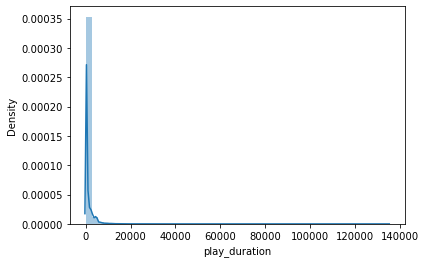

In [17]:
sns.distplot(df_1['play_duration'])
plt.show()

Dari grafik di atas dapat dilihat data tidak terdistribusi normal(Right Skew), yang selanjutnya diuji menggunakan uji normalitas shapiro

In [18]:
from scipy.stats import shapiro

norm, pval = shapiro(df_1['play_duration'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


Dikarenakan data yang tidak terdistribusi normal, maka acuan untuk menentukan titik pusat pada `play_duration` adalah **Median** = 40.

### Feature Selection
Selanjutnya adalah menentukan fitur yang nantinya akan menjadi variabel independen untuk dianalisa lebih lanjut

In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   hash_content_id    742582 non-null  object             
 1   hash_play_id       742582 non-null  object             
 2   hash_visit_id      742582 non-null  object             
 3   hash_watcher_id    742582 non-null  object             
 4   hash_event_id      742582 non-null  object             
 5   is_login           742582 non-null  bool               
 6   playback_location  742582 non-null  object             
 7   platform           742582 non-null  object             
 8   play_time          742582 non-null  datetime64[ns, UTC]
 9   end_time           742582 non-null  datetime64[ns, UTC]
 10  referrer           702119 non-null  object             
 11  average_bitrate    707495 non-null  float64            
 12  bitrate_range      742582 non-

##### Hipotesa Awal
- `platform` berpengaruh terhadap `play_duration`
- `average_bitrate` berpengaruh terhadap `play_duration`
- `total_bytes` berpengaruh terhadap `play_duration`
- `buffer_duration` berpengaruh terhadap `play_duration`
- `referrer_group` berpengaruh terhadap `play_duration`
- `has_ad` berpengaruh terhadap `play_duration`
- `app_name` berpengaruh terhadap `play_duration`
- `is_premium` berpengaruh terhadap `play_duration`
- `content_type` berpengaruh terhadap `play_duration`
- `Weekend` berpengaruh terhadap `play_duration`

In [20]:
df_play = df_1[['play_duration', 'platform', 'average_bitrate', 'total_bytes', 'buffer_duration', 'referrer_group', 'has_ad', 'app_name', 'is_premium', 'content_type', 'Weekend']]

In [21]:
df_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   play_duration    742582 non-null  int64  
 1   platform         742582 non-null  object 
 2   average_bitrate  707495 non-null  float64
 3   total_bytes      742582 non-null  int64  
 4   buffer_duration  742582 non-null  float64
 5   referrer_group   742582 non-null  object 
 6   has_ad           742582 non-null  bool   
 7   app_name         742582 non-null  object 
 8   is_premium       742582 non-null  bool   
 9   content_type     742582 non-null  object 
 10  Weekend          742582 non-null  int64  
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 52.4+ MB


### Platform

In [22]:
## Cek Platform
df_play['platform'].nunique()

7

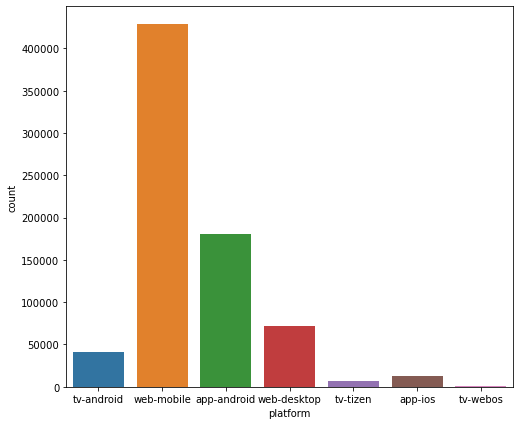

In [23]:
plt.figure(figsize=(8,7))
sns.countplot(df_play['platform'])
plt.show()

In [24]:
pd.crosstab(df_play['platform'], 'Jumlah')

col_0,Jumlah
platform,
app-android,180778
app-ios,12552
tv-android,41379
tv-tizen,7053
tv-webos,1168
web-desktop,71340
web-mobile,428312


In [25]:
((df_play['platform'].value_counts())*100/(len(df_play['platform']))).round(2)

web-mobile     57.68
app-android    24.34
web-desktop     9.61
tv-android      5.57
app-ios         1.69
tv-tizen        0.95
tv-webos        0.16
Name: platform, dtype: float64

User yang menonton video paling banyak menggunakan platform ``web-mobile`` (428312) atau sekitar 57,68% dari total data

### average_bitrate

In [26]:
## average_bitrate
df_play['average_bitrate'].describe()

count    707495.000000
mean     199515.374461
std      141363.148294
min         144.000000
25%         625.000000
50%      300000.000000
75%      300000.000000
max      300000.000000
Name: average_bitrate, dtype: float64

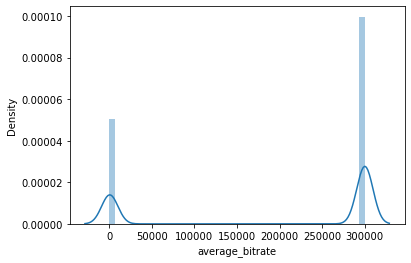

In [27]:
sns.distplot(df_play['average_bitrate'])
plt.show()

Dari data di atas dapat dilihat user yang menonton video memiliki kecenderungan di sekitar 0 atau 300000 bitrate. Data ini tidak dapat memberikan pengaruh informasi terhadap `play_duration` sehingga perlu dihapus.

In [28]:
df_play.drop(columns = 'average_bitrate', inplace = True)

### total_bytes

<AxesSubplot:xlabel='total_bytes', ylabel='play_duration'>

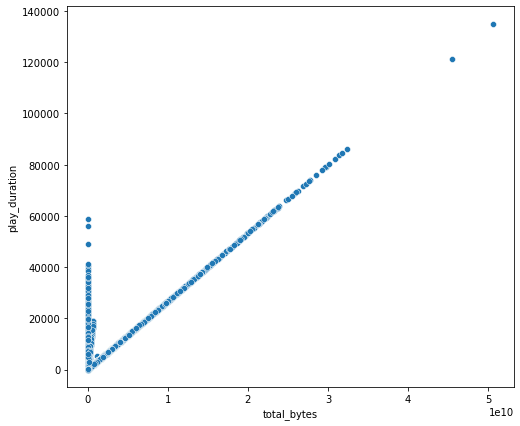

In [29]:
## total_bytes
plt.figure(figsize=(8,7))
sns.scatterplot(df_play['total_bytes'], df_play['play_duration'])

In [30]:
df_play[['play_duration', 'total_bytes']].corr()

,play_duration,total_bytes
play_duration,1.00000,0.83075
total_bytes,0.83075,1.00000


Nilai korelasi kuat (0.83) antara `play_duration` dan `total_bytes` dimana `play_duration` akan sangat bergantung terhadap nilai `total_bytes` ,sekalipun beberapa data `play_duration` berada pada value `total_bytes` yang bernilai 0. Namun informasi ini akan tetap digunakan untuk analisis korelasi tiap fiturnya nanti di akhir.

### buffer_duration

<AxesSubplot:xlabel='buffer_duration', ylabel='play_duration'>

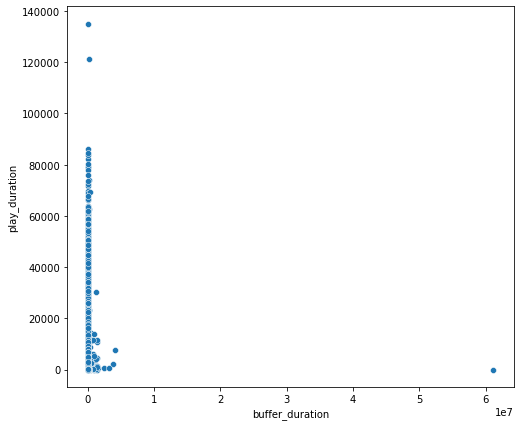

In [31]:
## Buffer Duration
plt.figure(figsize=(8,7))
sns.scatterplot(df_play['buffer_duration'], df_play['play_duration'])

In [32]:
df_play['buffer_duration'].describe()

count    7.425820e+05
mean     4.072597e+02
std      7.188516e+04
min     -4.639000e+00
25%      1.000000e-02
50%      1.000000e+00
75%      6.000000e+00
max      6.117224e+07
Name: buffer_duration, dtype: float64

Terdapat anomali korelasi dimana data `play_duration` berada di sekitar nilai 0 (dengan range yang sangat tinggi > 60 juta) dikarenakan terdapat data outliers. Namun informasi ini akan tetap disimpan untuk analisis selanjutnya.

### referrer_group

In [33]:
## Referrer Group
df_play['referrer_group'].value_counts()

others       247491
kapanlagi    108244
internal      79019
merdeka       76705
liputan6      73900
dream         44887
empty         40463
google        24209
bola          20868
bolanet       17049
otosia         4045
fimela         3862
emtek           786
facebook        672
telkomsel       301
twitter          80
brilio            1
Name: referrer_group, dtype: int64

In [34]:
df_play['referrer_group'].nunique()

17

Dapat dilihat bahwa video yang paling banyak ditonton oleh user(terlepas dari media lain, ``others``) yaitu referrer group **kapanlagi** sebanyak 108244 plays. Namun fitur ini akan dihapus dikarenakan terdapat banyak jenis data yang berbeda (17 referrer_group).

In [35]:
df_play.drop(columns = 'referrer_group', inplace = True)

### has_ad

In [36]:
## has_ad
((df_play['has_ad'].value_counts())*100/(len(df_play['has_ad']))).round(2)

True     76.9
False    23.1
Name: has_ad, dtype: float64

Dapat dilihat bahwa **76,9%** video yang ditonton oleh user memiliki iklan di dalamnya.

### app_name

In [37]:
## App Name
pd.crosstab(df_play['app_name'], 'Jumlah')

col_0,Jumlah
app_name,
bola,61
liputan6,82
vidio,742439


Dengan melihat data di atas, bahwa informasi di kolom `app_name` merupakan informasi yang sangat jelas dan dapat menyebabkan bias. sehingga perlu di drop.

In [38]:
df_play.drop(columns= 'app_name', inplace= True)

### is_premium

In [39]:
## is_premium
((df_play['is_premium'].value_counts())*100/(len(df_play['is_premium']))).round(2)

False    99.14
True      0.86
Name: is_premium, dtype: float64

Dapat dilihat bahwa 99% video yang ditonton oleh user merupakan bukan pengguna user premium. kolom ini akan di drop karena merupakan fitur yang tidak balance.

In [40]:
df_play.drop(columns = 'is_premium', inplace = True)

### content_type

In [41]:
## Content_type

df_play['content_type'].value_counts()

vod              468714
livestreaming    271020
catchup            2848
Name: content_type, dtype: int64

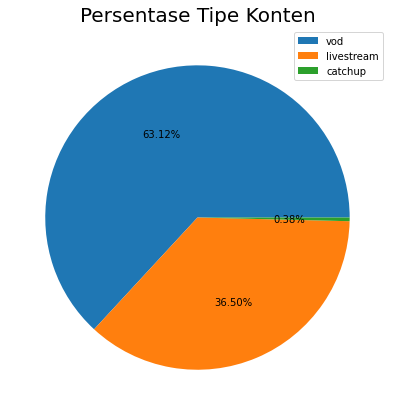

In [42]:
plt.figure(figsize=(8,7))
plt.pie(df_play['content_type'].value_counts(), autopct='%.2f%%')
plt.title ('Persentase Tipe Konten', size = 20)
plt.legend(['vod', 'livestream', 'catchup'])
plt.show()

Dapat dilihat bahwasanya tipe konten `vod` paling banyak ditonton oleh user dengan persentase 63,12%

### Weekend

In [43]:
## Weekend
((df_play['Weekend'].value_counts())*100/(len(df_play['Weekend']))).round(2)

0    67.67
1    32.33
Name: Weekend, dtype: float64

Dari data di atas dapat dilihat bahwa sekitar **32,33%** user yang menonton video pada waktu weekend (Sabtu-Minggu). 

In [44]:
## General Data Info
listItem = []
for col in df_play.columns :
    listItem.append([col, 
                     df_play[col].dtype, 
                     len(df_play),
                     df_play[col].isna().sum(), 
                     round((df_play[col].isna().sum()/len(df_play[col])) * 100,2),
                     df_play[col].nunique(), 
                     list(df_play[col].drop_duplicates().sample(2).values)])

df_playDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
df_playDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,play_duration,int64,742582,0,0.0,7160,"[2378, 11597]"
1,platform,object,742582,0,0.0,7,"[tv-tizen, web-desktop]"
2,total_bytes,int64,742582,0,0.0,10512,"[202462500, 37537500]"
3,buffer_duration,float64,742582,0,0.0,60590,"[63.361, 32.089]"
4,has_ad,bool,742582,0,0.0,2,"[False, True]"
5,content_type,object,742582,0,0.0,3,"[catchup, livestreaming]"
6,Weekend,int64,742582,0,0.0,2,"[1, 0]"


### Binning Data

In [45]:
df_dummy = pd.get_dummies(df_play, columns=['platform', 'content_type'])
df_dummy

,play_duration,total_bytes,buffer_duration,has_ad,Weekend,platform_app-android,platform_app-ios,platform_tv-android,platform_tv-tizen,platform_tv-webos,platform_web-desktop,platform_web-mobile,content_type_catchup,content_type_livestreaming,content_type_vod
0,1263,47362500,19.000,False,1,0,0,1,0,0,0,0,0,0,1
1,0,0,0.000,True,0,0,0,0,0,0,0,1,0,0,1
2,8,300000,0.290,True,1,0,0,0,0,0,0,1,0,0,1
3,53,1987500,0.000,True,1,0,0,0,0,0,0,1,0,0,1
4,53,1987500,0.000,True,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742577,38,1425000,0.000,True,1,0,0,0,0,0,0,1,0,0,1
742578,5,187500,0.220,True,1,0,0,0,0,0,0,1,0,0,1
742579,3,112500,0.658,True,1,0,0,0,0,0,0,1,0,0,1
742580,8,300000,0.542,True,1,0,0,0,0,0,0,1,0,0,1


<AxesSubplot:>

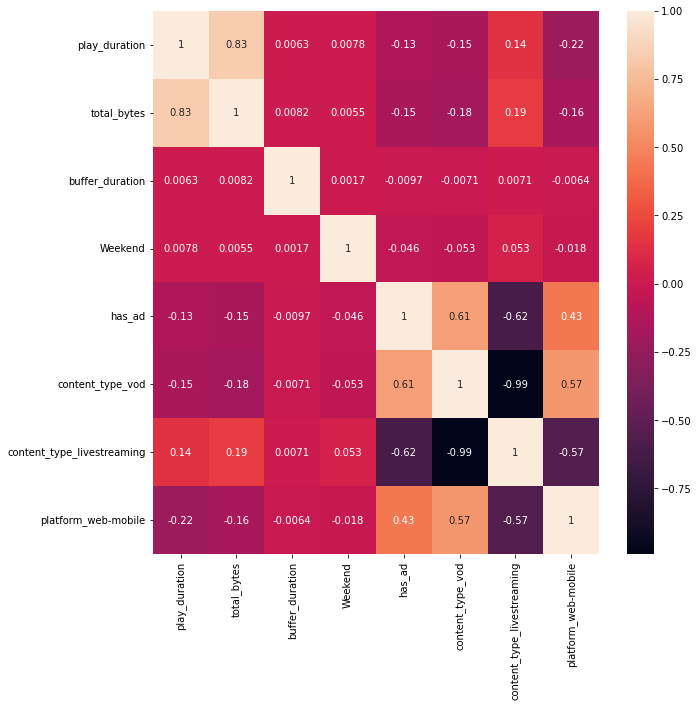

In [46]:
# Korelasi
plt.figure(figsize=(10,10))
sns.heatmap(df_dummy[['play_duration', 'total_bytes', 'buffer_duration', 'Weekend', 'has_ad', 'content_type_vod', 'content_type_livestreaming','platform_web-mobile']].corr(), annot=True)

Melihat sekilas dari heatmap di atas, korelasi antara `play_duration` dan `total_bytes` sangat kuat (0.83), yang nantinya dapat menyebabkan fitur lain tidak memiliki pengaruh terhadap `play_duration`. sehingga fitur `total_bytes` akan didrop.

In [47]:
df_dummy.drop(columns = 'total_bytes', inplace = True)

### Handling Outliers pada fitur buffer_duration

In [48]:
df_dummy['buffer_duration'].describe()

count    7.425820e+05
mean     4.072597e+02
std      7.188516e+04
min     -4.639000e+00
25%      1.000000e-02
50%      1.000000e+00
75%      6.000000e+00
max      6.117224e+07
Name: buffer_duration, dtype: float64

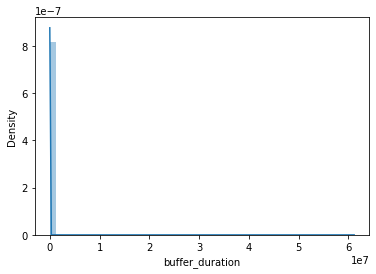

In [49]:
sns.distplot(df_dummy['buffer_duration'])
plt.show()

In [50]:
## Outliers
## Outlier Check With Function

Q1_amount = df_dummy['buffer_duration'].describe()['25%']
Q3_amount = df_dummy['buffer_duration'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = df_dummy[(df_dummy['buffer_duration'] < Q1_amount - (1.5 * iqr)) | (df_dummy['buffer_duration']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = df_dummy[(df_dummy['buffer_duration'] > Q1_amount - (1.5 * iqr)) & (df_dummy['buffer_duration']< Q3_amount + (1.5 * iqr)) ].index
df_dummy.loc[outlier_index]

,play_duration,buffer_duration,has_ad,Weekend,platform_app-android,platform_app-ios,platform_tv-android,platform_tv-tizen,platform_tv-webos,platform_web-desktop,platform_web-mobile,content_type_catchup,content_type_livestreaming,content_type_vod
0,1263,19.000,False,1,0,0,1,0,0,0,0,0,0,1
6,254,35.000,False,1,0,0,1,0,0,0,0,0,0,1
8,3533,56.789,True,1,1,0,0,0,0,0,0,0,0,1
84,113,34.972,True,1,0,0,0,0,0,0,1,0,0,1
126,0,44.688,True,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742546,2610,5180.000,True,1,1,0,0,0,0,0,0,0,1,0
742547,15,1178.000,False,1,0,0,1,0,0,0,0,0,1,0
742548,30,15.000,True,1,1,0,0,0,0,0,0,0,1,0
742551,120,33.000,True,1,1,0,0,0,0,0,0,0,1,0


Terdapat 119612 data outliers pada fitur `buffer_duration`, data ini perlu di drop karena data outliers ini memungkinkan beberapa data error (ex: ada nilai buffer yang minus, dan ada yang buffer hingga 60jt)

In [51]:
df_dummy.drop(index = df_dummy.loc[outlier_index].index, inplace = True)

<AxesSubplot:>

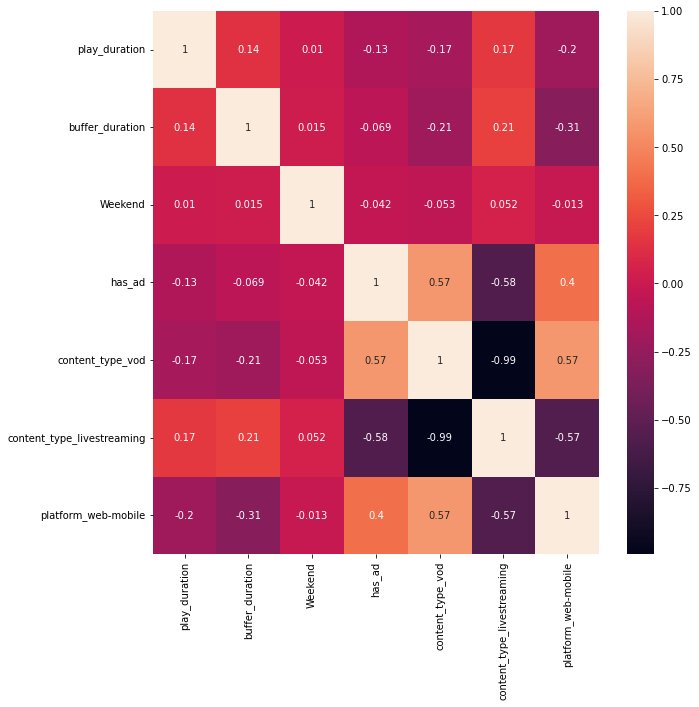

In [52]:
# Korelasi
plt.figure(figsize=(10,10))
sns.heatmap(df_dummy[['play_duration', 'buffer_duration', 'Weekend', 'has_ad', 'content_type_vod', 'content_type_livestreaming','platform_web-mobile']].corr(), annot=True)

Setelah data outliers `buffer_duration` dihapus, maka hasil korelasi antara `play_duration` dan `buffer_duration` semakin baik, dari (0.0063) menjadi (0.14)

In [53]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622970 entries, 1 to 742581
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   play_duration               622970 non-null  int64  
 1   buffer_duration             622970 non-null  float64
 2   has_ad                      622970 non-null  bool   
 3   Weekend                     622970 non-null  int64  
 4   platform_app-android        622970 non-null  uint8  
 5   platform_app-ios            622970 non-null  uint8  
 6   platform_tv-android         622970 non-null  uint8  
 7   platform_tv-tizen           622970 non-null  uint8  
 8   platform_tv-webos           622970 non-null  uint8  
 9   platform_web-desktop        622970 non-null  uint8  
 10  platform_web-mobile         622970 non-null  uint8  
 11  content_type_catchup        622970 non-null  uint8  
 12  content_type_livestreaming  622970 non-null  uint8  
 13  content_type_v

## Machine Learning Modelling
- Melakukan pemodelan Machine Learning dengan model regresi, untuk memprediksi nilai `play_duration`.
- **Alasan memilih `play_duration` sebagai target yaitu, waktu merupakan elemen yang paling bernilai yang dimiliki oleh manusia, ketika seseorang mau menghabiskan waktunya untuk menonton suatu video artinya orang tersebut mau membayar sesuatu untuk memenuhi kebutuhannya dalam menonton video tersebut. Sehingga menurut saya, durasi menonton menunjukkan seberapa suka user dalam menikmati video yang telah disediakan. Hal ini nantinya dapat dikembangkan untuk kebutuhan analisis lainnya.** 

In [54]:
## Penentuan X sebagai fitur (variabel independent), dan y sebagai target (variabel dependent)
X = df_dummy.drop(columns = 'play_duration')
y = df_dummy['play_duration']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 42)

In [56]:
X_train.head()

,buffer_duration,has_ad,Weekend,platform_app-android,platform_app-ios,platform_tv-android,platform_tv-tizen,platform_tv-webos,platform_web-desktop,platform_web-mobile,content_type_catchup,content_type_livestreaming,content_type_vod
123727,0.000,True,0,0,0,0,0,0,0,1,0,0,1
495134,0.072,True,1,0,0,0,0,0,0,1,0,0,1
76742,5.633,True,0,0,0,0,0,0,0,1,0,0,1
590710,0.000,True,0,0,0,0,0,0,0,1,0,0,1
631102,2.000,False,1,1,0,0,0,0,0,0,0,1,0


In [57]:
## def function modelling dan hasil evaluation matrix
def Eva_Matrix_DF(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_tr = Model.predict(X_train)
    R2_tr = r2_score(y_train, y_pred_tr)
    MAE_tr = mean_absolute_error(y_train, y_pred_tr)
    MSE_tr = mean_squared_error(y_train, y_pred_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    y_pred_ts = Model.predict(X_test)
    R2_ts = r2_score(y_test, y_pred_ts)
    MAE_ts = mean_absolute_error(y_test, y_pred_ts)
    MSE_ts = mean_squared_error(y_test, y_pred_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    data = {
    "Training " + Nama : [R2_tr, MAE_tr, MSE_tr, RMSE_tr],
    "Testing " + Nama: [R2_ts, MAE_ts, MSE_ts, RMSE_ts]}
    df = pd.DataFrame(data = data, index = ['R2', 'MAE', 'MSE', 'RMSE'])
    return df

In [58]:
df_dummy_LinReg = Eva_Matrix_DF(LinearRegression(fit_intercept=False), X_train, X_test, y_train, y_test, "Linear Regression")

In [59]:
df_dummy_LinReg

,Training Linear Regression,Testing Linear Regression
R2,6.085848e-02,5.948596e-02
MAE,3.654204e+02,3.575103e+02
MSE,1.417189e+06,1.268459e+06
RMSE,1.190458e+03,1.126259e+03


Dapat dilihat nilai R2 nya masih kecil(sekitar 0.06) baik untuk data training dan data testing, yang artinya fitur (variabel independent) yang digunakan dalam pemodelan menentukan target(variabel dependen: play_duration) tidak banyak mengubah besaran nilai varians(mean) dari target. fitur yang digunakan hanya mampu mereduksi model dengan menggunakan mean target sebesar 6%.

In [60]:
df_dummy_Lasso = Eva_Matrix_DF(Lasso(), X_train, X_test, y_train, y_test, "Lasso Regression")

In [61]:
df_dummy_Lasso

,Training Lasso Regression,Testing Lasso Regression
R2,6.002219e-02,5.922573e-02
MAE,3.658586e+02,3.579211e+02
MSE,1.418451e+06,1.268810e+06
RMSE,1.190987e+03,1.126415e+03


Sekali pun Lasso yang mampu memberikan pinalti terhadap fitur, tidak sanggup menaikkan nilai R2.

### Kesimpulan Machine Learning: 
- Fitur yang dipilih dan digunakan belum mampu memberikan model yang baik untuk menentukan nilai target.
- Perlu dilakukan analisis lebih lanjut, berupa pemilihan fitur yang tepat, atau feature engineering.

## Question 3
- Tools yang digunakan dalam proses EDA dan ML ialah dengan menggunakan bahasa pemrograman **Python** dan melakukan prosesnya di **JupyterLab**.
- Alasan menggunakan python di Jupyter adalah:
    - Python mudah dibaca karena bahasanya menekankan keterbacaan dan membuat pengkodean menjadi sangat mudah. Python juga merupakan bahasa pemrograman yang tumbuh paling cepat di dunia membuatnya ideal untuk semua jenis solusi perangkat lunak.
    - Python memiliki fungsi & method bawaan (built-in) yang memudahkan saya dalam proses EDA, yang bisa langsung diimpor dari library nya. Python juga menyediakan bagi penggunanya untuk dapat membuat library yang dapat diinstall dan digunakan dalam python, hal ini juga memudahkan saya untuk proses analisis Machine Learning.
    - Jupyter mampu memproses perintah pemrograman python di setiap cell nya, yang memudahkan saya untuk mengetahui benar/salah proses yang saya buat, tiap cellnya juga bisa di proses(run) secara tidak beraturan, artinya kita dapat melakukan perintah pada cell ke 5 lalu kembali ke cell 1. 
    

## Question 4

In [62]:
## Platform yang disukai oleh penonton
pd.crosstab(df['platform'], columns = 'Jumlah')

col_0,Jumlah
platform,
app-android,180778
app-ios,12552
tv-android,41379
tv-tizen,7053
tv-webos,1168
web-desktop,71340
web-mobile,428312


In [63]:
## Persentase platform yg digunakan
((df_play[['platform']].value_counts())*100/(len(df_play['platform']))).round(2)

platform   
web-mobile     57.68
app-android    24.34
web-desktop     9.61
tv-android      5.57
app-ios         1.69
tv-tizen        0.95
tv-webos        0.16
dtype: float64

In [64]:
len(df['hash_watcher_id'].unique())/len(df['hash_watcher_id'])*100

86.78826042107134

- 57.68% video yang diputar oleh penonton berasal dari platform web-mobile, hal ini mungkin dikarenakan penonton merasa dimudahkan hanya dengan menggunakan web-mobile tanpa harus menginstall aplikasi di perangkat masing-masing. 
- Mungkin juga dikarenakan banyaknya jumlah penonton yang berbeda (86.78%) yang dapat mengindikasikan penonton menggunakan web-mobile hanya sekadar ingin melihat video yang disediakan. 

**note**: Dengan asumsi penonton memiliki smartphone

## Question 5

Dengan Asumsi banyaknya visitor per hari berdasarkan play_durasinya, dimana hari ditentukan dari play_time nya

In [65]:
## Check range waktu
df_1['play_time'].describe()

count                        742582
unique                       536519
top       2020-02-14 13:50:47+00:00
freq                             11
first     2020-02-01 09:18:22+00:00
last      2020-02-16 16:59:55+00:00
Name: play_time, dtype: object

terdapat 16 hari, dari tanggal 1 hingga tanggal 16 di bulan dan tahun yang sama (februari 2020)

In [66]:
## Parsing tanggal menurut harinya
df_1['DAY'] = df_1['play_time'].dt.day
df_1['DAY'].nunique()

16

In [281]:
## Looping function untuk menentukan Top ten visitor berdasarkan tanggal hari nya (1 - 16)
dict = {}
for i in range(1,17):
    visitor = df_1.loc[df_1['DAY'] == i, ['hash_watcher_id', 'play_duration']].sort_values('play_duration', ascending= False)[:10]
    visitor = visitor.reset_index()
    visitor = visitor.set_index(pd.Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
    waktu = "Tanggal " + str(i)
    dict[waktu]=visitor

In [265]:
## Menentukan 10 visitor per harinya
## Tanggal 1
dict['Tanggal 1']

,index,hash_watcher_id,play_duration
1,637897,90d7ad72d3654651578d79f419d9b6e6db686fd9434c31...,58725
2,660621,bb0de967a76e2d5a2d8db4b149007b226c0d648509112e...,44850
3,657278,6f84b0f2ad1ea59d75508524f2086660fb3c57fee20b8c...,43230
4,648809,ee9cf45b99998761942a7d5598833e74501fecd1590cb7...,37140
5,658144,7016235109ffa7112d48d393d85b6201241cfcb117ffdd...,34185
6,626758,d130dc42a9444835c27bb69f4f7288dea41f689a531f13...,32475
7,649883,0e8e3ed229cf18ad9a0fd8302699a4627fcdd9e6c7a9ae...,28050
8,650733,27b6f6afe0bfaed18706af84b211ccb04d25ae73597ff5...,27840
9,625165,e2990e2b6c4532957cb25755115fcfdf4e1967776c641a...,27570
10,517410,77a15528eb0a0518234257292ee1e7e8b8a3859e8f0255...,26760


In [266]:
## Menentukan 10 visitor per harinya
## Tanggal 2
dict['Tanggal 2']

,index,hash_watcher_id,play_duration
1,621316,aaf687799a8eca50cdc7b7ad32d8d5d0d6d1e0436bab31...,121320
2,649684,a4978c0192cf3cbd7dbbdd80102674268bb7184d2e663e...,56790
3,624884,1cfd58aed797e8537561b31bc45ea508e284677da850f5...,54840
4,717935,11d8b3d629797af224350d2499822493fd729b162e9368...,54165
5,734636,658348f50d1662db532435f8880edfc2a0fb03ee12dfcf...,41550
6,654518,55f321da4c467da029383e69b18e40e3f5bbc1f1360775...,39390
7,717666,035f3a9d36663189add1e26f49183f67f4e902e3132ad2...,37290
8,521213,7bcaab470aeb19ea1b7e895d988f23320a0be95179f29c...,37290
9,725438,4e6972d0d83046c5601773506b8f13009515deb45a0dcd...,37275
10,524703,043c5fd9988aac88d869e98aa1ced60b8a8595e687cfde...,37275


In [267]:
## Menentukan 10 visitor per harinya
## Tanggal 3
dict['Tanggal 3']

,index,hash_watcher_id,play_duration
1,108615,705a7c92170bbea2f4246d2e2fe664ec53436492698068...,63210
2,146623,08a730ce8c2c5a13b732c249c0fdd65c92f2218f11cfa9...,59790
3,161433,b2ec077a4d2b615041e18ab623a201a52be93c25bfcbfb...,59760
4,556968,48033588fd7d685d7e5c761d19f261bdf8c83765c3c9fa...,58170
5,556957,1a2323c754ae44530766b3222d866242a902a64c1d74eb...,42765
6,156040,bd283c66b3f44455d7681e263ca62153ab6d99053269b6...,42015
7,526868,f3edab5574806d828eecba11f830ca5f3a18432bcfdc1a...,41880
8,523766,44458ff71ca3d5caf4d9a71b86611fb1fe13839e835793...,41715
9,537362,88914ced76379a9f28c8c523249c90f49b5f851487b84c...,41190
10,124410,f7e8fe2596406a0a57b38989dc6398ee6000b9851bce57...,41040


In [268]:
## Menentukan 10 visitor per harinya
## Tanggal 4
dict['Tanggal 4']

,index,hash_watcher_id,play_duration
1,19144,133af93c4a0191b2d31fecb34b7653836abe32b769be23...,86310
2,372172,8dbc827eb307f4fc84e53fd644ce5fd82a4cf97f9c43b2...,79095
3,169732,2ce526e43e20c71967e56d41b2fe1dab95dc500d5d7815...,71775
4,376400,aded2c8c74909e789c180a3fdc1d40e2c6d7f10f1a9a4a...,57525
5,380606,ca9ab4ce9aa7a8b190635b43fa51a98a3cb1123d56c1ec...,49380
6,165313,e35649085eccde94c86390512f2ac21fc63755fa9c13ff...,47565
7,17210,42eec878a7eb4feb9de11be43d916baa7cb38ec5d088c4...,45030
8,109832,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,40920
9,10157,1854e6967500738e9970c7d9bdddb1782fd88daaf92994...,39435
10,13156,b0dd914db00f01dbb63ef58cd969b0b25baa6e4395d531...,38640


In [269]:
## Menentukan 10 visitor per harinya
## Tanggal 5
dict['Tanggal 5']

,index,hash_watcher_id,play_duration
1,374813,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,73920
2,610336,76e738a82a9c4e155aeb74b789734a791faf16a5984e3f...,67890
3,599386,4913095d84fbb603f6912619980ca47eee565fb58706cb...,66705
4,361248,92ccad50d05cae7f2910b63c7e812db3209de19fa80bd0...,61425
5,348661,4dffd8f810e692245ed4c7556c01973542ae2385f733e7...,60600
6,343987,2c1233983cff70b44143f1f505e2c355b92adfa2c9dde7...,59085
7,357246,3a30324796cb348b42cbe1ab1ffbcf6c3856273c9bc478...,58710
8,172301,220d2e23698eb6f3787c483b9da93e5f408737c9b8b623...,49920
9,345044,8b14b321f128d5f9f630fb0ee95d9145939d5e7911fb0f...,44580
10,172450,1dc26d0cbc3be25773b67aa4eb8d6b7d1c5a56b2396cce...,43665


In [270]:
## Menentukan 10 visitor per harinya
## Tanggal 6
dict['Tanggal 6']

,index,hash_watcher_id,play_duration
1,570866,86a2b1765777e4b55825e0a084f3941e7b923870ab91ac...,56985
2,571616,d2ddcaff05721eeee27a132d21afe27f328b5277a67df1...,56955
3,305758,404171a5240ec541f5dd98821ce41ef947558be632ba23...,56295
4,574545,656e85eed9145e1b7bc517cb8948a3bb22f07db193f22e...,53265
5,297346,7a5204efdf9341709de390171d780b76e04b32f2f811b0...,51870
6,573814,08d180154fa892cc27b42aa46a3cc5a2aaefbe34ad2be0...,47265
7,356193,d6ac1ba7e58020835c7cf3c55a8b77bd1cf21e0f2dff3e...,47040
8,193116,7386f4aab27b3c41cd0cb5ebe3a1dffaf9a405d7fe5bba...,46485
9,302190,788f17249e6b09387084167fd2d9557a5ecad848986155...,43275
10,579600,57545a8465112b4180ea73600a4bf528cddb51b4a75304...,42375


In [271]:
## Menentukan 10 visitor per harinya
## Tanggal 7
dict['Tanggal 7']

,index,hash_watcher_id,play_duration
1,258981,0bad1104020df39953e06b5836826319063313f0c7fc3c...,69870
2,250911,bf0778ec11e3a40423f9bf3c32c4399f56f8aa6babbd75...,59325
3,577297,c147f9572c8cfabefe3227dfb4bb755d0c1c86973effcc...,50790
4,185596,aca520b2d5fb7796b57adaeb6ea57f22036474ba1964c3...,47970
5,263560,73b8cf3d7d321fff95fefeb4492efaddb8a249da223bfd...,43620
6,253013,d53b5b7d9ba718fe3f1ebf110272ac5ba88634d9536f39...,42735
7,310427,758824a93f18a2368834fa718ee1fc0a04cb0270bd3281...,33795
8,263434,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,33000
9,299945,7117430d6c00348dccf935913d0b80311e800300dee9c9...,31995
10,260363,6bc04050e8413ae7d213bc07d3efafb1222c0f4cb7ce2f...,31740


In [272]:
## Menentukan 10 visitor per harinya
## Tanggal 8
dict['Tanggal 8']

,index,hash_watcher_id,play_duration
1,474709,f453868f5f590bbe27c725e3142e5fa9191f6c2209b75d...,84690
2,413256,0eccebdeada96e13fe8e8603c31a1a8e882115537692f6...,83625
3,412693,35dedf0129b43395cc6591ef77216ed16c442546839f72...,51165
4,495784,226e99125329494fd541dbaa454ee5b315034d6cee1a25...,47040
5,267860,cd698451a3385cb95360dec17d47e0a45df416768747a0...,43155
6,227401,1da9b790ffa7e3bf0f51c8ac5842252252aeb0cd174b48...,41520
7,412745,99e9562f9e519382940b68c286bdb621a00ae95465f8dc...,41205
8,218491,369f8f4e71e823499583e7a219e5900003d3a4a0450a40...,35985
9,250949,62c58aab1b60011c98b1838397bb25fd9910a0e904e317...,35760
10,211484,ae4e6ae3fb00f03c4a8cddfaa9f7069bb7b04e90caceae...,35445


In [273]:
## Menentukan 10 visitor per harinya
## Tanggal 9
dict['Tanggal 9']

,index,hash_watcher_id,play_duration
1,177091,132b270ad8e26bbce11248d7f029e93e8f4fc9091967c8...,72525
2,319772,bc9a27c415b3e9f9284f4ef3e00f4b4eee5257571615bd...,51885
3,319910,1e8c3e457307d40b5f119fd194eae5b6b201a50921cbf7...,51885
4,318220,4f5d51318b60540bc069de7c7784d768f71700366bdd6c...,50820
5,418684,20310b80200808fdad8167d81bd54ae50858cf10447649...,39555
6,738974,d286de2b3ef95a61e2fe798fcdd0d57d0a099e4ed15bca...,37305
7,217842,8521f91e5138fff45a8b739a47cb390d07ac0fa15cc282...,35655
8,320000,6c96a5f4f51605c4f4b9104351dcc3557d43ec4c5694f1...,35190
9,216789,29106aa27a9545a009c0740a45842ecebc2a5843dd3d86...,34470
10,317944,536205a3b2684da423c67189ce07c3bb208fc859b3bec0...,33315


In [274]:
## Menentukan 10 visitor per harinya
## Tanggal 10
dict['Tanggal 10']

,index,hash_watcher_id,play_duration
1,150735,c12f5648f67a56575026377fcb984631e7454a72802133...,79245
2,442585,9bddfef1e4787155fe746638781dea777997b3d97c94be...,76050
3,440038,1167d3a59bbb596d5c1c823b20da0b048ae1bf6ccb000a...,73710
4,318951,c0b70915820c7a1423a661a6d520b6457422bd8bb742ad...,52290
5,440783,ae3bd4edb690d77d403c8702b81124015dd471d45b2fe4...,49620
6,72621,0594bc3a6ebbbec1e76eb3af341d515b0eea330bf3f895...,43320
7,615481,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,40860
8,319608,e78ae21cc7a7922daa25376e96340401fd1992a33ba662...,39105
9,89584,719910753cf9c914e1c0eeb64a98b1008c47f7bc41dae9...,37995
10,693555,8cc483f8c4d6351145b367c39b01ba89f8beaba85a0748...,36585


In [275]:
## Menentukan 10 visitor per harinya
## Tanggal 11
dict['Tanggal 11']

,index,hash_watcher_id,play_duration
1,284989,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,62160
2,702514,a24c2d6cd0ab77e17643d8799c554daa74dc9513511ce0...,56670
3,285559,04b0b323ed215e03f028f23edbda89de9e0538a46c2e08...,55275
4,288463,02d17fedab647020d428d6b51ec23bc0b6bf84ec3ccf79...,53175
5,289460,776e48e84671a07387303994f8eabe8ae9ca9ec70b06eb...,50235
6,449085,4e6972d0d83046c5601773506b8f13009515deb45a0dcd...,46935
7,395084,e1ed51f65ecc6c28a822a302e77f134785a48d18be00b0...,45660
8,88057,c2d778f16d2b8ec1497086c2b1cff962afef2526c2b8ca...,41910
9,362091,d86702003d0f5e55a2808ca635730fae39bab7fea196ef...,38685
10,90484,861c26daa847bc9e34430d3aecaa956bd78201bd174c4b...,37320


In [276]:
## Menentukan 10 visitor per harinya
## Tanggal 12
dict['Tanggal 12']

,index,hash_watcher_id,play_duration
1,670220,870cc0d9d23e937521030008b91a382298a5143d6df54c...,58620
2,315567,a4f1e38936c8c2ec3638a1fefc3d3513309d4903271905...,57165
3,38238,da95979983e9de0e7ae1b925fcb8e1f7c35d5010a1ea14...,44850
4,102663,2117be5129c5a6c010fb5007d916a12a0b58dda4e79b87...,40605
5,446882,8d7762f64e0541a7e35f60fd24dd846d206d171a18ee2b...,36945
6,283568,f48adb790ee2fc2466ce5afb40faa857dc47a93ae4d9df...,33375
7,697199,d5ae55bef5ee030ff8a0b0b175589f7b19e4667a14fc21...,33315
8,104182,2d1818c8f784341b4cc66f7e21d174a57027e4a3ea80a5...,32325
9,312456,4a990079d3bc71f3e6f96c85acc662a9f94f7b9c99e6bc...,31500
10,450185,133af93c4a0191b2d31fecb34b7653836abe32b769be23...,29760


In [277]:
## Menentukan 10 visitor per harinya
## Tanggal 13
dict['Tanggal 13']

,index,hash_watcher_id,play_duration
1,77845,50bec4cb38e85bc8b7905570fc289e4968112261f0b682...,135075
2,130921,2c8da6968188464375da789944fe751e19a0d523293c57...,82380
3,516312,6669ead3cec70ed81d55e507ed0c2d22634fdc0d3ce01a...,69225
4,239974,55315e1d0232d68a5586914aaf2e28cb84475cec8874f0...,66120
5,75257,c0d8d6dc26326a9e96f68da07ba652803cf2ee430b2d6b...,56235
6,222352,fad9e424c903916146aba2a0aac64a5ceb5c8838357875...,55455
7,239079,b46b43aaba5d0030ab0ef6b742a7f1d1c30c4e443df5c7...,52230
8,240198,d0bc5c1ec7d86f95f24d39fbf114e0b4a2473de9571599...,50610
9,680376,5802bdb1c8153117765b8621e0474f3dd0fa21fe9eba13...,48720
10,49428,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,45000


In [278]:
## Menentukan 10 visitor per harinya
## Tanggal 14
dict['Tanggal 14']

,index,hash_watcher_id,play_duration
1,433262,ef3c924dabb08f779cd8ca0a2023392a69dfb0673d3a4e...,80280
2,433250,03826d87c719b025ce5d7762ba13107c97b6cb4af87413...,78120
3,437446,8cbf92387d7114edb8ca8a87412bf9d2149fd492ff8622...,68955
4,82416,b51bac6a4566b540768d347c7969b049a579a8949fae9b...,62820
5,713069,5c2c733f87d5f8f2baec826ce71e16f7e3b714f2404109...,61815
6,487417,aba359e881bf599bb33c96058ff803a24a20d7c648d8fe...,57615
7,239955,f9da9418965134ad811f9329ec7c9d5ab5b430ae109308...,51660
8,485344,a40af2673079bd42c9170845f8bb57a6b681fd98578ec5...,50520
9,82122,9fdf2aaa742556c7bcc7ce4323f270c7cd7abc57519511...,48435
10,82118,425d3de0ceeb2faff64d3338c90831668774f9fe8f0675...,43995


In [279]:
## Menentukan 10 visitor per harinya
## Tanggal 15
dict['Tanggal 15']

,index,hash_watcher_id,play_duration
1,340663,3d3fbb2cd5d16910d0c800b275d99581ffc617c0a8de15...,63840
2,466684,fd59c4eec80f20868c75e326535fc93af0776ef9d5efa7...,63435
3,66053,e3c8ef3ca8379213ac8a99ea534711ce2f450dcf817430...,61875
4,410967,eee2b31b4668b5c2e9149450607d5e7d4cf115cf531c29...,57660
5,491531,46f4b526e6b88a254af122af574ce3098509fd538c57c6...,54405
6,410521,66b0d9b8ec28a17d248fed5916842a4eee5a890ea4fa02...,53640
7,410037,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,46200
8,619535,ff4605638fd765d2285081caddb4af8fd43d5df15d664b...,43080
9,462274,653955eb2f3d4578cba32a291369c69f1a957c623cc68a...,40020
10,710,f8ea5b687f787eda052b0277d216f7eb736a121ef71930...,39975


In [280]:
## Menentukan 10 visitor per harinya
## Tanggal 16
dict['Tanggal 16']

,index,hash_watcher_id,play_duration
1,339052,374179f05f4f6a381170b8099aa4641df18f60b3e01558...,48945
2,460875,3e933bdfd2322d9946cc5313a841cb7e57d56870d32292...,41190
3,466807,a2e68b9e4c5c73b86fe311fcb1c76fe3561d529ce1f195...,35265
4,69924,7fa96f94a26a60a1ac50ef2a88594d107e7bef8992f767...,34380
5,270664,6e58eae541122db441bc362cdb2540c535278c8dd8bcd9...,34260
6,411835,db6112e7e220824384c5d639234325196f366e3c4511ad...,33870
7,65812,0b540ba0b57976990c3404fe68d7c17396827f671d0b10...,32115
8,459392,5d3dc12fb793d638ba679872d3b064c64e458455e97182...,30840
9,461483,4d3e14f878bc0d11d569732dc7117b2d04eafc304604e3...,30180
10,458460,41f9399e828a066df72d16365ec53614daad67bcdd1bee...,28770
